In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob
import numpy as np
import ast

In [2]:
!pwd

/home/anhduy/age_gender_Pi/Age_Gender_Pi/notebooks


In [3]:
DATA_PATH = '/home/Data/UTK_Face_Dataset/'

RAW = os.path.join(DATA_PATH, 'raw/UTKface_inthewild')
CSV = os.path.join(DATA_PATH, 'processed')
CROPPED = os.path.join(DATA_PATH, 'interim')

In [4]:
raw_1 = os.path.join(RAW, 'part1/')
raw_2 = os.path.join(RAW, 'part2/')
raw_3 = os.path.join(RAW, 'part3/')

csv_1 = os.path.join(CSV, 'part1/utk_face.csv')
csv_2 = os.path.join(CSV, 'part2/utk_face.csv')
csv_3 = os.path.join(CSV, 'part3/utk_face.csv')

cropped_1 = os.path.join(CROPPED, 'part1/cropped/')
cropped_2 = os.path.join(CROPPED, 'part2/cropped/')
cropped_3 = os.path.join(CROPPED, 'part3/cropped/')

In [5]:
df_1 = pd.read_csv(csv_1)
df_2 = pd.read_csv(csv_2)
df_3 = pd.read_csv(csv_3)

In [6]:
df_1.head()

,file_name,age,gender,x_min,y_min,x_max,y_max,land_mark,confidence
0,14_1_0_20170109213221821.jpg,14,1,0.354479,0.187393,0.510651,0.343310,"[0.388671875,0.447265625,0.4296875,0.421875,0....",0.998481
1,22_1_4_20170103223356448.jpg,22,1,0.354326,0.282728,0.668876,0.877608,"[0.419921875,0.5546875,0.48828125,0.4453125,0....",0.825770
2,32_1_4_20170103225047472.jpg,32,1,0.326124,0.170544,0.653032,0.523520,"[0.40234375,0.560546875,0.474609375,0.40820312...",0.998947
3,69_1_0_20170110153425759.jpg,69,1,0.283831,0.193012,0.752508,0.656700,"[0.416015625,0.638671875,0.541015625,0.4394531...",0.999283
4,36_0_0_20170105164112403.jpg,36,0,0.207014,0.198215,0.802053,0.809087,"[0.384765625,0.65234375,0.513671875,0.37890625...",0.999599


In [7]:
df_2.head()

,file_name,age,gender,x_min,y_min,x_max,y_max,land_mark,confidence
0,27_1_0_20170117164325646.jpg,27.0,1.0,0.511596,0.161608,0.700930,0.493838,"[0.564453125,0.662109375,0.6171875,0.576171875...",0.998628
1,41_1_0_20170117135713137.jpg,41.0,1.0,0.329922,0.127566,0.711984,0.719928,"[0.45703125,0.6328125,0.572265625,0.462890625,...",0.998807
2,80_0_0_20170117173759783.jpg,80.0,0.0,0.177418,0.160898,0.791983,0.825648,"[0.3359375,0.61328125,0.470703125,0.337890625,...",0.999470
3,28_1_1_20170116164405234.jpg,28.0,1.0,0.289587,0.084972,0.635107,0.509629,"[0.349609375,0.505859375,0.42578125,0.3828125,...",0.999304
4,42_0_3_20170117175439914.jpg,42.0,0.0,0.178105,0.188131,0.770048,0.960011,"[0.275390625,0.537109375,0.380859375,0.3476562...",0.997337


In [8]:
df_3.head()

,file_name,age,gender,x_min,y_min,x_max,y_max,land_mark,confidence
0,70_1_0_20170120221601317.jpg,70,1,0.400908,0.099802,0.605982,0.314374,"[0.453125,0.52734375,0.501953125,0.498046875,0...",0.998073
1,65_1_3_20170119202621117.jpg,65,1,0.465112,0.070082,0.614679,0.376858,"[0.51171875,0.578125,0.537109375,0.5078125,0.5...",0.821712
2,23_0_3_20170119164331517.jpg,23,0,0.324708,0.236603,0.934510,0.897245,"[0.5859375,0.84765625,0.802734375,0.62890625,0...",0.999671
3,28_0_0_20170119194754322.jpg,28,0,0.393118,0.252056,0.626147,0.676919,"[0.4453125,0.5546875,0.49609375,0.46484375,0.5...",0.992787
4,36_0_3_20170119194743443.jpg,36,0,0.481118,0.090480,0.768492,0.568593,"[0.57421875,0.703125,0.650390625,0.5859375,0.6...",0.996354


In [9]:
example = df_1.iloc[0]

In [53]:
img = cv2.imread(os.path.join(raw_1, example['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [54]:
img.shape

(1300, 957, 3)

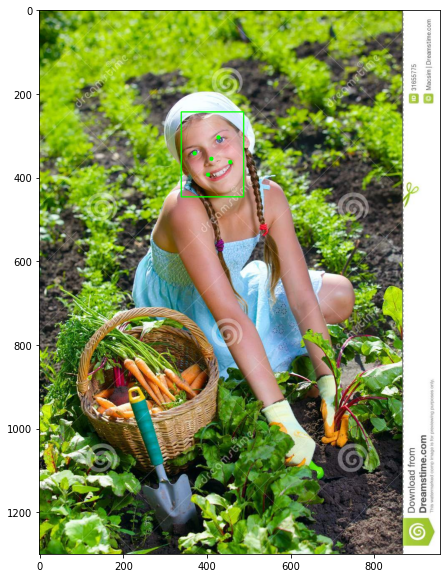

In [56]:
cv2.rectangle(img, (int(example['x_min']*img.shape[1]), int(example['y_min']*img.shape[0])), (int(example['x_max']*img.shape[1]), int(example['y_max']*img.shape[0])), (0, 255, 0), 2)

landmarks = ast.literal_eval(example['land_mark'])
for i in range(5):
    cv2.circle(img, (int(landmarks[i]*img.shape[1]), int(landmarks[i+5]*img.shape[0])), 5, (0, 255, 0), -1)

plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

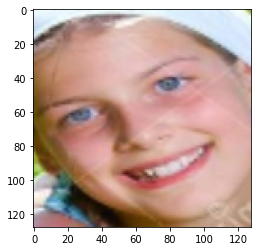

In [41]:
img = cv2.imread(os.path.join(cropped_1, example['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [39]:
df_2.describe()

,age,gender,x_min,y_min,x_max,y_max,confidence
count,10054.0,10054.0,10054.000000,10054.000000,10054.000000,10054.000000,10054.000000
mean,inf,inf,0.321807,0.148077,0.683214,0.607174,0.990591
std,NaN,NaN,0.103916,0.070428,0.102554,0.175043,0.036714
min,1.0,0.0,-0.032149,-0.289923,0.229155,0.162016,0.504382
25%,26.0,0.0,0.254318,0.101902,0.621214,0.476612,0.997261
50%,30.0,0.0,0.318389,0.144001,0.685796,0.610903,0.999076
75%,40.0,1.0,0.384485,0.189927,0.748234,0.734590,0.999446
max,inf,inf,0.746368,0.623816,1.124034,1.135555,0.999915


In [40]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10054 entries, 0 to 10053
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   file_name   10054 non-null  object 
 1   age         10054 non-null  float64
 2   gender      10054 non-null  float64
 3   x_min       10054 non-null  float64
 4   y_min       10054 non-null  float64
 5   x_max       10054 non-null  float64
 6   y_max       10054 non-null  float64
 7   land_mark   10054 non-null  object 
 8   confidence  10054 non-null  float64
dtypes: float64(7), object(2)
memory usage: 707.0+ KB


In [42]:
df_2[df_2.isin([np.nan, np.inf, -np.inf]).any(1)]

,file_name,age,gender,x_min,y_min,x_max,y_max,land_mark,confidence
1059,53__0_20170116184028385.jpg,inf,inf,0.437109,0.321193,0.828733,0.771484,"[0.57421875,0.748046875,0.662109375,0.56640625...",0.999583


In [43]:
df_2[~df_2.isin([np.nan, np.inf, -np.inf]).any(1)]

,file_name,age,gender,x_min,y_min,x_max,y_max,land_mark,confidence
0,27_1_0_20170117164325646.jpg,27.0,1.0,0.511596,0.161608,0.700930,0.493838,"[0.564453125,0.662109375,0.6171875,0.576171875...",0.998628
1,41_1_0_20170117135713137.jpg,41.0,1.0,0.329922,0.127566,0.711984,0.719928,"[0.45703125,0.6328125,0.572265625,0.462890625,...",0.998807
2,80_0_0_20170117173759783.jpg,80.0,0.0,0.177418,0.160898,0.791983,0.825648,"[0.3359375,0.61328125,0.470703125,0.337890625,...",0.999470
3,28_1_1_20170116164405234.jpg,28.0,1.0,0.289587,0.084972,0.635107,0.509629,"[0.349609375,0.505859375,0.42578125,0.3828125,...",0.999304
4,42_0_3_20170117175439914.jpg,42.0,0.0,0.178105,0.188131,0.770048,0.960011,"[0.275390625,0.537109375,0.380859375,0.3476562...",0.997337
...,...,...,...,...,...,...,...,...,...
10049,44_0_1_20170113184928967.jpg,44.0,0.0,0.319566,0.063989,0.700895,0.415971,"[0.419921875,0.58984375,0.5234375,0.46875,0.60...",0.990692
10050,24_1_1_20170113011327776.jpg,24.0,1.0,0.033798,0.145867,0.760621,0.747345,"[0.193359375,0.5390625,0.345703125,0.240234375...",0.925036
10051,26_1_0_20170117201757542.jpg,26.0,1.0,0.209231,0.037128,0.717439,0.538439,"[0.333984375,0.544921875,0.482421875,0.4296875...",0.999254
10052,24_1_1_20170115234849261.jpg,24.0,1.0,0.272236,0.128498,0.618737,0.529403,"[0.37109375,0.529296875,0.462890625,0.40820312...",0.998344
